In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np
import sys
import pickle

np.set_printoptions(threshold=sys.maxsize, suppress=True)

class validation_set:
	def __init__(self, X_train, y_train, X_test, y_test):
		self.X_train = X_train
		self.y_train = y_train
		self.X_test = X_test
		self.y_test = y_test

class test_set:
	def __init__(self, X_test, y_test):
		self.X_test = X_test
		self.y_test = y_test

class data_set:
	def __init__(self, validation_set, test_set):
		self.validation_set = validation_set
		self.test_set = test_set

def generate_train_test(file_name):
	pd.options.display.max_colwidth = 200

	#Lee el corpus original del archivo de entrada y lo pasa a una DataFrame
	df = pd.read_csv("cal_housing.csv", sep=',', engine='python')
	X = df.drop(['medianHouseValue'],axis=1).values
	y = df['medianHouseValue'].values
	
	#Separa el corpus cargado en el DataFrame en el 90% para entrenamiento y el 10% para pruebas
	X_train, X_test, y_train, y_test = \
	train_test_split(X, y, test_size=0.2, shuffle = False)
	
	#~ print (X_train.shape)
	#~ print (X_train)
	#~ print (y_train.shape)
	#~ print (y_train)
	
	#~ #Crea pliegues para la validación cruzada
	validation_sets = []
	kf = KFold(n_splits=10, shuffle=True)
	for train_index, test_index in kf.split(X_train):
		#~ print("TRAIN:", train_index, "\n",  "TEST:", test_index)
		X_train_, X_test_ = X_train[train_index], X_train[test_index]
		y_train_, y_test_ = y_train[train_index], y_train[test_index]
		#~ #Agrega el pliegue creado a la lista
		validation_sets.append(validation_set(X_train_, y_train_, X_test_, y_test_))
	
	#~ #Almacena el conjunto de prueba
	my_test_set = test_set(X_test, y_test)	
	
	#~ #Guarda el dataset con los pliegues del conjunto de validación y el conjunto de pruebas
	my_data_set1 = data_set(validation_sets, my_test_set) 
	
	return (my_data_set1)

	
if __name__=='__main__':
	my_data_set1 = generate_train_test('cal_housing.csv')
	
	print (my_data_set1.test_set.X_test)
	#~ print(type(my_data_set.test_set.X_test))
	#~ print ('\n----------------------------------------------------------------------------------\n')
	
	#Guarda el dataset en formato csv
	np.savetxt("../Practica 2/CSV/data_test.csv", my_data_set1.test_set.X_test, delimiter=",", fmt="%s",
           header="Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday")
	
	np.savetxt("../Practica 2/CSV/target_test.csv", my_data_set1.test_set.y_test, delimiter=",", fmt="%s",
           header="target", comments="")
    
	i = 1
	for val_set in my_data_set1.validation_set:
		np.savetxt("../Practica 2/CSV/data_validation_train" + str(i) + ".csv", val_set.X_train, delimiter=",", fmt="%s",
           header="Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday", comments="")
		np.savetxt("../Practica 2/CSV/data_validation_test" + str(i) + ".csv", val_set.X_test, delimiter=",", fmt="%s",
           header="Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday", comments="")
		np.savetxt("../Practica 2/CSV/target_validation_train" + str(i) + ".csv", val_set.y_train, delimiter=",", fmt="%s",
           header="target", comments="")
		np.savetxt("../Practica 2/CSV/target_validation_test" + str(i) + ".csv", val_set.y_test, delimiter=",", fmt="%s",
           header="target", comments="")
		i = i + 1

[[ -121.22      37.72      34.      2123.       387.      1310.
    368.         2.6368]
 [ -121.22      37.81      17.      2879.       542.      1802.
    530.         3.6378]
 [ -121.22      37.8       28.      2608.       576.      1719.
    554.         2.1186]
 [ -121.22      37.8       37.      1038.       222.       521.
    211.         2.125 ]
 [ -121.21      37.81      18.      2404.       498.      1531.
    506.         2.995 ]
 [ -121.21      37.8       31.       699.       186.       460.
    170.         2.7443]
 [ -121.21      37.8       44.       300.        72.       160.
     73.         2.1786]
 [ -121.21      37.8       45.       370.        84.       167.
     70.         1.4853]
 [ -121.21      37.79      33.       811.       185.       446.
    198.         1.6724]
 [ -121.21      37.8       33.      1862.       429.       971.
    389.         2.6053]
 [ -121.21      37.81       8.      1883.       298.       999.
    301.         5.193 ]
 [ -121.2       37.8 

In [3]:
	#Guarda el dataset en pickle
	dataset_file = open ('dataset.pkl','wb')
	pickle.dump(my_data_set1, dataset_file)
	dataset_file.close()
	
	dataset_file = open ('dataset.pkl','rb')
	my_data_set_pickle = pickle.load(dataset_file)
	print ("-----------------------------------------------")
	print (my_data_set_pickle.test_set.X_test)

-----------------------------------------------
[[ -121.22      37.72      34.      2123.       387.      1310.
    368.         2.6368]
 [ -121.22      37.81      17.      2879.       542.      1802.
    530.         3.6378]
 [ -121.22      37.8       28.      2608.       576.      1719.
    554.         2.1186]
 [ -121.22      37.8       37.      1038.       222.       521.
    211.         2.125 ]
 [ -121.21      37.81      18.      2404.       498.      1531.
    506.         2.995 ]
 [ -121.21      37.8       31.       699.       186.       460.
    170.         2.7443]
 [ -121.21      37.8       44.       300.        72.       160.
     73.         2.1786]
 [ -121.21      37.8       45.       370.        84.       167.
     70.         1.4853]
 [ -121.21      37.79      33.       811.       185.       446.
    198.         1.6724]
 [ -121.21      37.8       33.      1862.       429.       971.
    389.         2.6053]
 [ -121.21      37.81       8.      1883.       298.       999

                  longitude  latitude  housingMedianAge  totalRooms  \
longitude              1.00     -0.92             -0.11        0.04   
latitude              -0.92      1.00              0.01       -0.04   
housingMedianAge      -0.11      0.01              1.00       -0.36   
totalRooms             0.04     -0.04             -0.36        1.00   
totalBedrooms          0.07     -0.07             -0.32        0.93   
population             0.10     -0.11             -0.30        0.86   
households             0.06     -0.07             -0.30        0.92   
medianIncome          -0.02     -0.08             -0.12        0.20   
medianHouseValue      -0.05     -0.14              0.11        0.13   

                  totalBedrooms  population  households  medianIncome  \
longitude                  0.07        0.10        0.06         -0.02   
latitude                  -0.07       -0.11       -0.07         -0.08   
housingMedianAge          -0.32       -0.30       -0.30         -0.12 

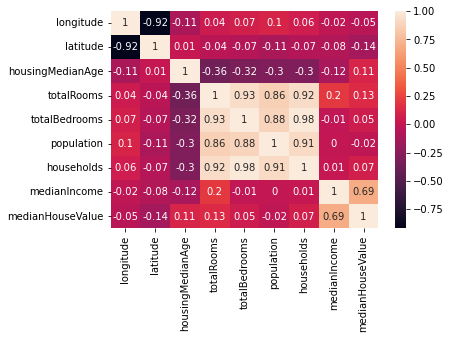

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Lee el corpus original del archivo de entrada y lo pasa a una DataFrame
df = pd.read_csv('cal_housing.csv', sep=',', engine='python')

X = df['totalRooms'].values
y = df['medianIncome'].values
plt.scatter(X,y)
plt.xlabel('num_bedrooms')
plt.ylabel('price')

#~ plt.show()

#~ #Correlación 
#~ X = df.drop(['price'],axis=1).values
#~ print (X)

correlation_matrix = df.corr().round(2)
print(correlation_matrix)
sns.heatmap(data=correlation_matrix, annot=True)
plt.savefig('correlation_matrix.png')
plt.show()